# Ungraded Lab: Cost Function for Logistic Regression

In this lab, you will implement the cost function for logistic regression.

## Dataset 
Let's start with the same dataset as before.

In [1]:
import numpy as np

X = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y = np.array([0, 0, 0, 1, 1, 1])

We'll use a helper function to plot this data. The data points with label $y=1$ are shown as red crosses, while the data points with label $y=0$ are shown as black circles.

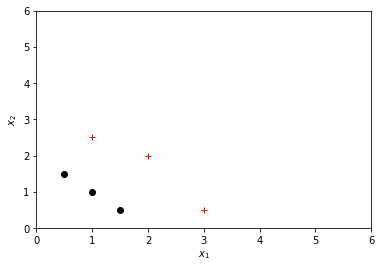

In [3]:
from lab_utils import plot_data
import matplotlib.pyplot as plt

plot_data(X,y)

# Set both axes to be from 0-6
plt.axis([0, 6, 0, 6])
# Set the y-axis label
plt.ylabel('$x_2$')
# Set the x-axis label
plt.xlabel('$x_1$')
plt.show()

## Cost function

First, you will implement a non-vectorized version of the cost function. Then, you will implement a vectorized version.


### Non- vectorized version

Recall that for logistic regression, the cost function is of the form 

$$ J(\mathbf{w}) = \frac{1}{m} \sum_{i=0}^{m-1} \left[ cost(f_{\mathbf{w}}(\mathbf{x}^{(i)}), y^{(i)}) \right]$$

where
* m is the number of training examples in the dataset 

* $cost(f_{\mathbf{w}}(\mathbf{x}^{(i)}), y^{(i)})$ is the cost for a single data point, which is - 

    $$cost(f_{\mathbf{w}}(\mathbf{x}^{(i)}), y^{(i)}) = -y^{(i)} \log\left(f_\mathbf{w}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_\mathbf{w}\left( \mathbf{x}^{(i)} \right) \right)$$
    
*  $f_\mathbf{w}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$, which is the actual label


* For a logistic regression model for the dataset given above, the model can be representented as:

    $f_\mathbf{w}(x) = g(w_0 + w_1x_1 + w_2x_2)$

    where $g(z)$ is the sigmoid function:

    $g(z) = \frac{1}{1+e^{-z}}$ 
 

* **Preprocessing step** 

   For ease of implementation, we will add an additional column of ones to $\mathbf{X}$ (as $x_0$) so that  
    $f_\mathbf{w}(x) = g(w_0x_0 + w_1x_1 + w_2x_2)$
    
    By doing this, to calculate the prediction from the model $f_\mathbf{w}(x)$, we can write a for loop that calculates $w_jx_j$ at each step

In [58]:
# Add a column to X_orig to account for the w_0 term
X_mod = np.hstack([np.ones((X.shape[0],1)), X])

print(X_mod)

[[1.  0.5 1.5]
 [1.  1.  1. ]
 [1.  1.5 0.5]
 [1.  3.  0.5]
 [1.  2.  2. ]
 [1.  1.  2.5]]


#### Side Note: sigmoid function implementation
We've implemented the `sigmoid` function for you already and you can simply import and use it, as shown in the code block below.

In [59]:
from lab_utils import sigmoid 

print(sigmoid(0))

0.5


#### Implementation

Now, you'll implement the non-vectorized version of the cost function. We've already provided some starter code for you which does the following -
* There is a for loop over all the examples in the dataset
* There is a list to store the cost calculated for each example that we add to 
* The total cost is then computed as the sum of cost for each example divided by the number of examples

We assume that the function takes in the paramaters $w$ as a list/array.


**Exercise**

You'll complete the cost function by implementing the following steps inside the for loop - 

* First, you'll compute the models prediction $f(x^{(i)})$ for a single data point at index $i$ as shown below.

   ```
   z = 0
   for j in range(n):
       z += w[j] * X[i][j]
   f = sigmoid(z)
   ```
   
   Since $w_0x_0 + w_1x_1+w_2x_2 = \mathbf{w}\cdot \mathbf{x}$, you can also calculate  $f(x^{(i)})$ as 
   ```
   z = np.dot(w, X[i])
   f = sigmoid(z)
   ```
* Then, you'll compute the cost for the single data point at index $i$ as 

  ```
  cost = -y[i]*np.log(f) - (1-y[i])*np.log(1-f)
  ```

In [60]:
def compute_cost(X, y, w):
    # Here X is assumed to pre-processed with a column of ones added as x_0

    m, n = X.shape
    cost_list = []
    
    for i in range(m):
        ### START CODE HERE ### 

        ### END CODE HERE ### 
        
        cost_list.append(cost)
        
    total_cost = (1/m)* sum(cost_list)
    return total_cost

Check the implementation of your cost function using the cell below.

In [61]:
w = np.array([-3,1,1])
print(compute_cost(X_mod, y, w))

0.3668667864055174


**Expected output**: 0.3668667864055174

Now, let's see what the cost function output is for a different value of $w$. 

* In the last ungraded lab, you plotted the decision boundary for  $w_0 = -3, w_1 = 1, w_2 = 1$. That is, you had `w = np.array([-3,1,1])`.

* Let's say you want to see if $w_0 = -4, w_1 = 1, w_2 = 1$, or `w = np.array([-4,1,1])` provides a better model.

Let's first plot the decision boundary for these two different $w_0$ values to see which one fits the data better.

* For $w_0 = -3, w_1 = 1, w_2 = 1$, we'll plot $-3 + x_1+x_2 = 0$, which is equivalent to $x_2 = 3 - x1$ (shown in blue)
* For $w_0 = -4, w_1 = 1, w_2 = 1$, we'll plot $-4 + x_1+x_2 = 0$, which is equivalent to $x_2 = 4 - x1$ (shown in magenta)

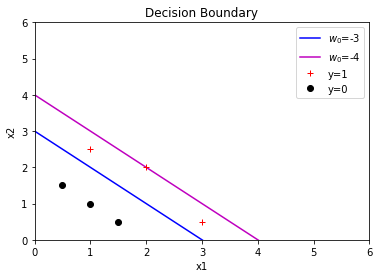

In [4]:
import matplotlib.pyplot as plt

# Choose values between 0 and 6
x1 = np.arange(0,6)

# Plot the two decision boundaries
x2 = 3 - x1
x2_other = 4 - x1

# Plot the decision boundary
plt.plot(x1,x2, c="b", label="$w_0$=-3")
plt.plot(x1,x2_other, c="m", label="$w_0$=-4")
plt.axis([0, 6, 0, 6])

# Plot the original data
plot_data(X,y)
# Set the y-axis label
plt.ylabel('x2')
# Set the x-axis label
plt.xlabel('x1')

plt.legend(loc="upper right")
plt.title("Decision Boundary")
plt.show()

You can see from this plot that `w = np.array([-4,1,1])` is a worse model for our data. Let's see if you can see this from your cost function implementation as well.

In [63]:
w_array1 = np.array([-3,1,1])
w_array2 = np.array([-4,1,1])

print("Cost for w0 = -3 : ", compute_cost(X_mod, y, w_array1))
print("Cost for w0 = -4 : ", compute_cost(X_mod, y, w_array2))

Cost for w0 = -3 :  0.3668667864055174
Cost for w0 = -4 :  0.503680863674846


**Expected output**

Cost for w0 = -3 :  0.3668667864055174

Cost for w0 = -4 :  0.503680863674846


You can see that your cost function behaves as expected and the cost for `w = np.array([-4,1,1])` is indeed higher than the cost for `w = np.array([-3,1,1])`

### (Optional ) Vectorized version

You will now implement a vectorized version of the cost function.

The vectorized version of the cost function formula is 

$$ J(\mathbf{w}) = \frac{1}{m} (-\mathbf{y}^T \text{log}(\mathbf{f_w}) - (1-\mathbf{y})^T  \text{log}(1-\mathbf{f_w}))$$ 

where

$$ \mathbf{f_w} = g(\mathbf{X} \mathbf{w})$$

As before, $g$ is the sigmoid function.



**Exercise**

You'll complete the vectorized cost function by implementing the following steps - 

* First, you'll compute the models prediction $f(x)$ as shown below

   ```
   z = np.matmul(X, w)
   f = sigmoid(z)
   ```
  

* Then, you'll compute the cost as 

  ```
  total_cost = (1/m)*(np.dot(-y, np.log(f)) - np.dot((1-y), np.log(1-f)))
  ```

**Debugging Tip:** Vectorizing code can sometimes be tricky. One common strategy for debugging is to print out the sizes of the matrices you are working with using the size function. For example, given a data matrix $\mathbf{X}$ of size 6 × 3 (6 examples, 3 features) and $\mathbf{w}$, a vector with dimensions 3x1, you can observe that $\mathbf{Xw}$ is a valid multiplication operation, while $\mathbf{wX}$ is not.

In [54]:
def compute_cost_vectorized(X, y, w):
    # Here X is assumed to pre-processed with a column of ones added as x_0
    m = X.shape[0]
    
    ### START CODE HERE ### 

    ### END CODE HERE ### 
    
    return total_cost

Now let's check if the output of this function is equivalent to the output of your non-vectorized implementation above.

In [55]:
print("Cost computed by non-vectorized version: ", compute_cost(X_mod, y, w))
print("Cost computed by vectorized version: ", compute_cost_vectorized(X_mod, y, w))

Cost computed by non-vectorized version:  0.3668667864055174
Cost computed by vectorized version:  0.3668667864055174


**Expected output**

Cost computed by non-vectorized version:  0.3668667864055174

Cost computed by vectorized version:  0.3668667864055174
